In [32]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
%matplotlib inline

# plot parameters
param = "param"
NUMBER_OF_POINTS = "NumberOfPoints"
NUMBER_OF_CLUSTERS = "NumberOfClusters"
NUMBER_OF_DIMENSIONS = "NumberOfDimensions"

assignment = ":="
end =";"

def GenCluster(n,mu,std,rot=True):
    d = len(mu)
    coords = np.random.normal(loc=mu,scale=std,size=(n,d))
    if rot == True:    
        Q = ortho_group.rvs(d)
        mu = np.array(mu)
        coords = np.matmul(coords-mu,Q)
        coords = coords + mu
    return coords

def GenerateClusters(num_points=[100,100,100],STD=[[1,1],[1,1],[1,1]],rot=True):
    num_points = np.array(num_points)
    STD = np.array(STD)
    (num_clusters,d) = STD.shape
    MU = np.random.uniform(low=-10,high=10,size=(num_clusters,d))
    N = num_points.sum()
    coords = np.zeros((N,d))
    labels = np.zeros(N,dtype='int')
    i0 = 0
    for k in np.arange(num_clusters): 
        n = num_points[k]
        mu = MU[k,:]
        std = STD[k,:]
        coords[i0:i0+n,:] = GenCluster(n,mu,std,rot=rot)
        labels[i0:i0+n]   = k
        i0 = i0 + n
    return (coords,labels)


In [33]:

# cluster parameters
num_points = [100,100,100]
STD = [[1,1],[1,1],[1,1]]
rot = True

(coords,labels) = GenerateClusters(num_points=num_points,STD=STD,rot=rot)

In [34]:
df = pd.DataFrame(coords)
df.head()

,0,1
0,-0.197217,8.255923
1,1.184272,7.080087
2,1.131134,8.758666
3,0.563816,9.643193
4,-0.234380,10.334680


In [35]:
arr = df.values
for k in range(len(arr)):
    for i in range(2):
        print(k+1,i+1,arr[k][i])
        

1 1 -0.1972171501574954
1 2 8.255922735858558
2 1 1.184272038409139
2 2 7.080087136888171
3 1 1.1311344708472622
3 2 8.758666355151753
4 1 0.5638162664047717
4 2 9.643192639374849
5 1 -0.234380152618621
5 2 10.33468047713621
6 1 -0.4903895788350575
6 2 8.570525780315492
7 1 -0.8202284432658473
7 2 9.257876686367876
8 1 -1.0954317638115345
8 2 7.733106340239902
9 1 -0.288055946026896
9 2 7.503862808685779
10 1 -1.2269423882811554
10 2 8.27728328335731
11 1 1.789770232354928
11 2 10.263402030631793
12 1 -0.8217164796840639
12 2 7.93759523741616
13 1 -0.11731902623195409
13 2 8.420800667779956
14 1 -2.133295614033085
14 2 8.683830883780312
15 1 2.0754870347094756
15 2 8.021947354197463
16 1 0.4521535536216029
16 2 8.140439418363458
17 1 -1.4191524666770858
17 2 8.475560477734314
18 1 -0.39565199845345955
18 2 6.933213221309428
19 1 -1.224306902189491
19 2 8.411146271365148
20 1 -0.842422752398127
20 2 6.607510584244701
21 1 1.438595842075844
21 2 9.634082922610231
22 1 -0.9535060016666048

In [36]:
df = df.reset_index()
df['Index'] = df.index+1

In [37]:
df.head()

,index,0,1,Index
0,0,-0.197217,8.255923,1
1,1,1.184272,7.080087,2
2,2,1.131134,8.758666,3
3,3,0.563816,9.643193,4
4,4,-0.234380,10.334680,5


In [38]:
df.drop(['level_0','index'],axis=1)

ValueError: labels ['level_0'] not contained in axis

In [39]:
df.to_csv('3CentroidTest_Points.csv')

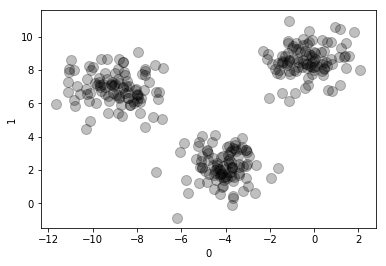

In [40]:
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha)